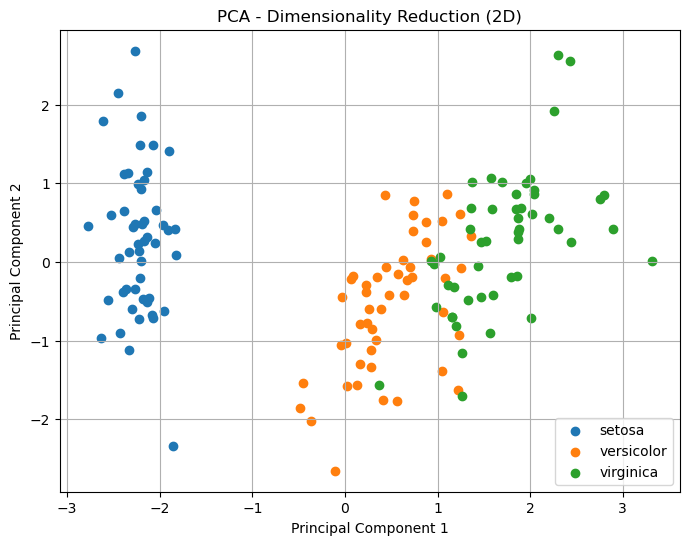

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load high-dimensional dataset (Iris)
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Convert to DataFrame for plotting
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Target'] = y

# Plotting the PCA-reduced dataset
plt.figure(figsize=(8, 6))
for label in np.unique(y):
    plt.scatter(df_pca[df_pca['Target'] == label]['PC1'],
                df_pca[df_pca['Target'] == label]['PC2'],
                label=iris.target_names[label])
plt.title('PCA - Dimensionality Reduction (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


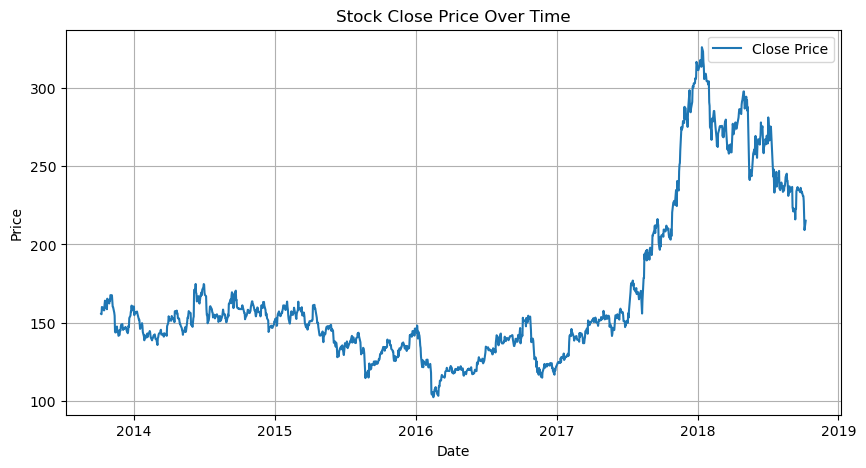

ADF Statistic: -1.0731515511756986
p-value: 0.7256591584063026
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1044
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2511.901
Date:                Tue, 08 Apr 2025   AIC                           5035.803
Time:                        14:53:05   BIC                           5065.502
Sample:                    10-08-2013   HQIC                          5047.067
                         - 10-06-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0314      0.029     -1.093      0.274      -0.088       0.025
ar.L2          0.0572      0.024      2.412      0.016       0.011  

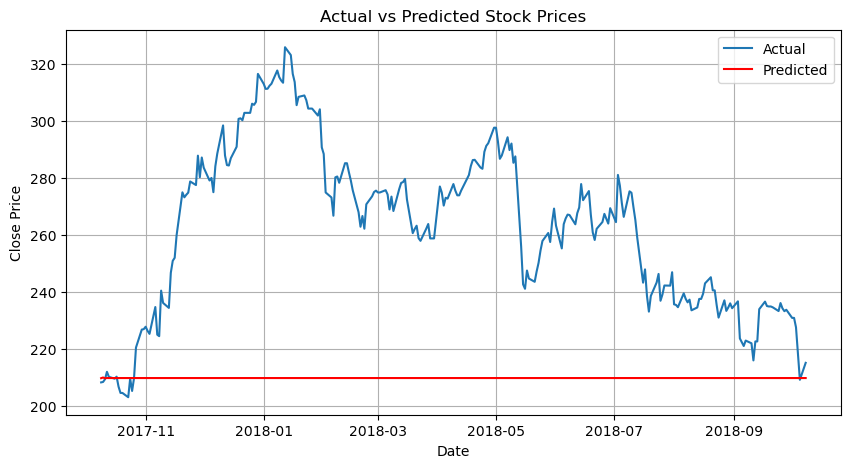

MAE: 52.83
RMSE: 59.92
MAPE: 19.17%


In [9]:
# Stock Price Forecasting using ARIMA

#  1. Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

#  2. Load dataset
df = pd.read_csv('stock-prices.csv')

#  3. Data preprocessing
# Convert Date column to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Sort the index and set frequency
df = df.sort_index()
df = df.asfreq('B')  # Business day frequency
df = df.ffill()      # Forward fill missing values

#  4. Exploratory Data Analysis
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Close Price')
plt.title('Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()

#  5. Feature Engineering
# Lag feature
df['Lag1'] = df['Close'].shift(1)
# Rolling means
df['MA7'] = df['Close'].rolling(window=7).mean()
df['MA30'] = df['Close'].rolling(window=30).mean()

#  6. Stationarity Test using ADF
dftest = adfuller(df['Close'].dropna())
print("ADF Statistic:", dftest[0])
print("p-value:", dftest[1])

#  7. Prepare data for modeling
df_model = df[['Close']].dropna()
train_size = int(len(df_model) * 0.8)
train, test = df_model[:train_size], df_model[train_size:]

#  8. Build and Train ARIMA model
model = ARIMA(train, order=(5, 1, 0))  # (p,d,q)
model_fit = model.fit()
print(model_fit.summary())

#  9. Forecast
forecast = model_fit.forecast(steps=len(test))

#  10. Visualization of Prediction vs Actual
plt.figure(figsize=(10, 5))
plt.plot(test.index, test['Close'], label='Actual')
plt.plot(test.index, forecast, label='Predicted', color='red')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

#  11. Model Evaluation
mae = mean_absolute_error(test['Close'], forecast)
rmse = np.sqrt(mean_squared_error(test['Close'], forecast))
mape = np.mean(np.abs((test['Close'] - forecast) / test['Close'])) * 100

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")
